In [1]:
%matplotlib notebook
from pylab import *
from matplotlib import pyplot as plt
import numpy as np
from craco.search_pipeline import location2pix, get_grid_lut_from_plan, grid_candidates
import craco
from craft.craco import printstats


In [2]:
d = np.load('/data/craco/ban115/craco-python/mainbuf_after_run_iblk0_ib0.npy')

In [3]:
d.shape
# (nuvrest, ndmout, nblk, nt, nuvwide, complex)
# nuvwide - number of UV points teh FDMT does simultaneosly. Fixed at 8 for this version of the firmware. All UV point
# must have the saem bottom frequency 
#
# Nt - number of samples per block
# nblk - number of blocks to remember - circular buffer
# ndmout - number of DM trials generated by FDMT - units of samples
# nuvrest - number of UV / nuvwide and rounded appropriately

# Note; The main buff of uv is split into 8 chunks - which you can load separtely ib%d.npy

(83, 186, 11, 256, 8, 2)

<IPython.core.display.Javascript object>


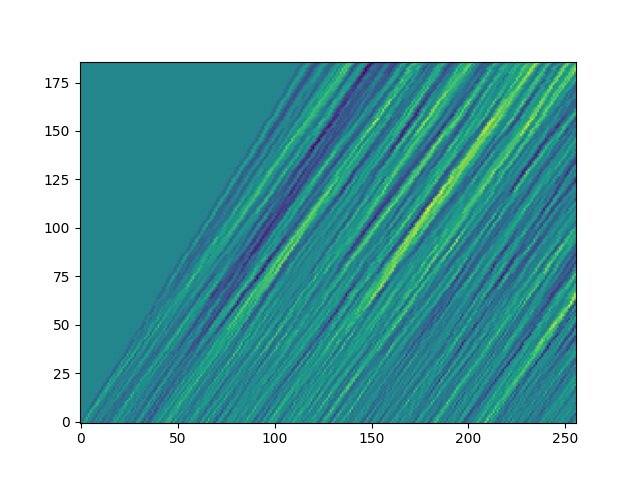

<IPython.core.display.Javascript object>


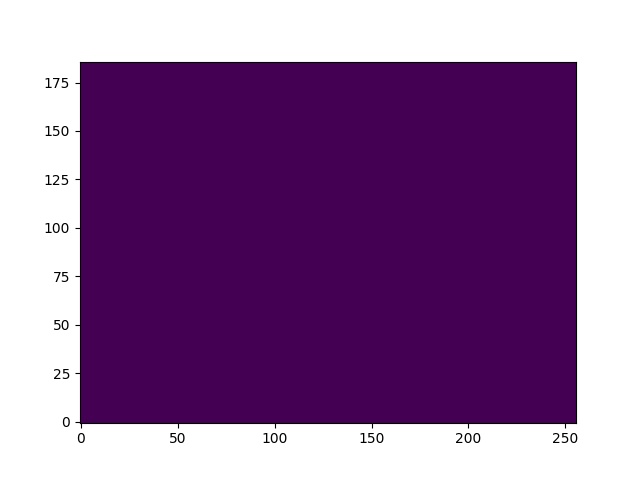

136


In [4]:
plt.figure()
plt.imshow(d[50,:,0,:,0,0], origin='lower') # tblk = 0 should contain data after 1 execution
plt.figure()
plt.imshow(d[25,:,1,:,0,0], origin='lower') # check tblk=1 is all zeros after 1 execution
print(d.max())


In [5]:
d1 = np.load('/data/craco/ban115/craco-python/mainbuf_after_run_iblk1_ib0.npy')

<IPython.core.display.Javascript object>


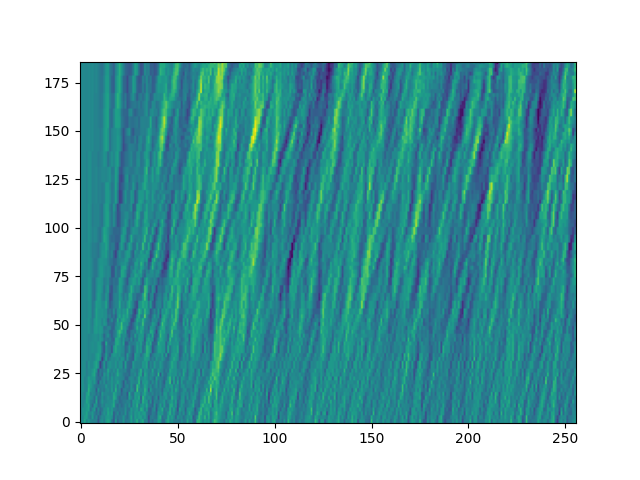

<IPython.core.display.Javascript object>


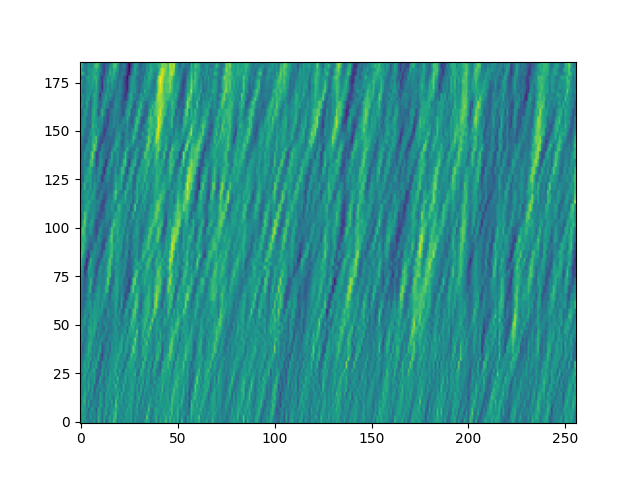

In [6]:
plt.figure()
plt.imshow(d1[25,:,0,:,0,0], origin='lower')
plt.figure()
plt.imshow(d1[25,:,1,:,0,0], origin='lower')


In [7]:
d.shape
assert np.all(d[:,:,0,:,:,:] == d1[:,:,0,:,:,:]), 'Shouldnt touch slot 0 after block'

In [8]:
d[0,:,0,:,0,0].std()

21.780534342520323

In [9]:
din = np.load('/data/craco/ban115/craco-python/uv_data_iblk0.npy')

In [10]:
din.shape

(659, 256, 32, 8, 2)

<IPython.core.display.Javascript object>


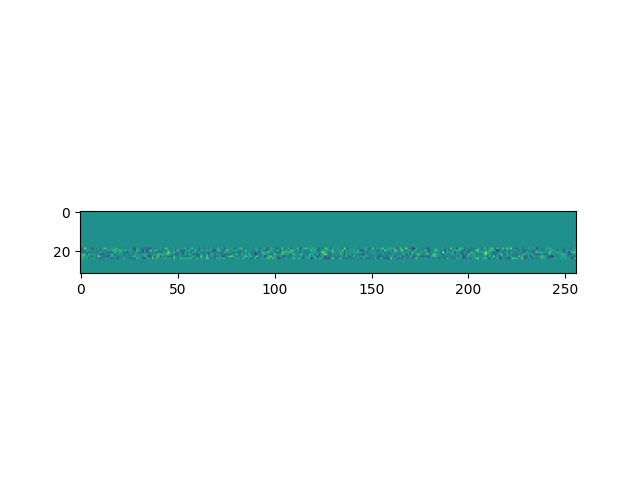

In [11]:
plt.figure()
plt.imshow(din[50,:,:,0,0].T) # baseline to uv has put only a few channels in this FDMT run - the rest is padded with zeros


In [12]:
print(printstats(din))

 max/min/mean/rms/sum/S/N = 1.70e+01/-1.70e+01/1.99e-04/1.73e+00/1.72e+04/9.9 peak at (223, 62, 1, 4, 1)


In [13]:
dsumuv = din.sum(axis=3).sum(axis=0)

In [14]:
dsumuv.shape

(256, 32, 2)

<IPython.core.display.Javascript object>


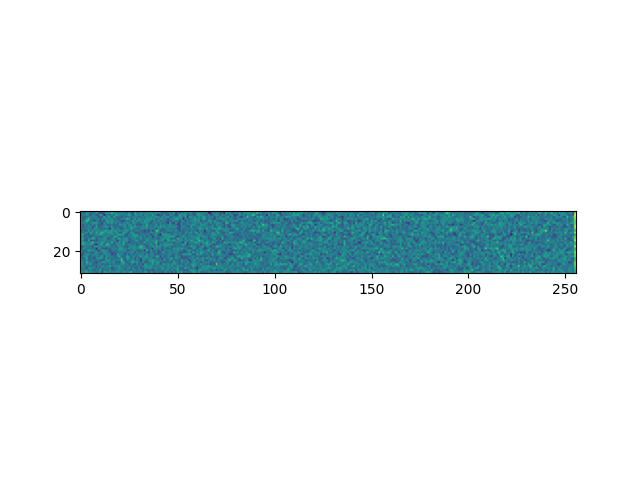

In [15]:
plt.figure()
imshow(dsumuv[:,:,0].T)

In [16]:
dbox = np.load('/data/craco/ban115/craco-python/boxcar_hist_iblk0.npy')

In [17]:
dbox.shape

(1024, 8, 256, 256)

 max/min/mean/rms/sum/S/N = 1.75e+03/-1.10e+03/-4.70e-01/8.92e+01/-2.46e+05/19.6 peak at (0, 0, 0)


<IPython.core.display.Javascript object>


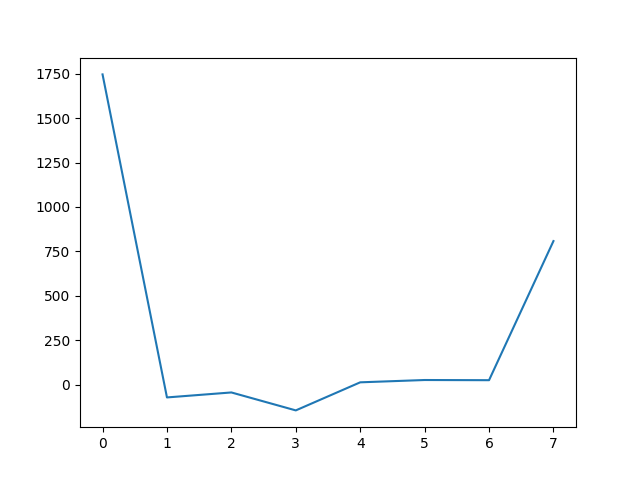

In [18]:
dbox0 = dbox[0, ...]
print(printstats(dbox0))
plt.figure()
plt.plot(dbox[0,:,0,0])

<IPython.core.display.Javascript object>


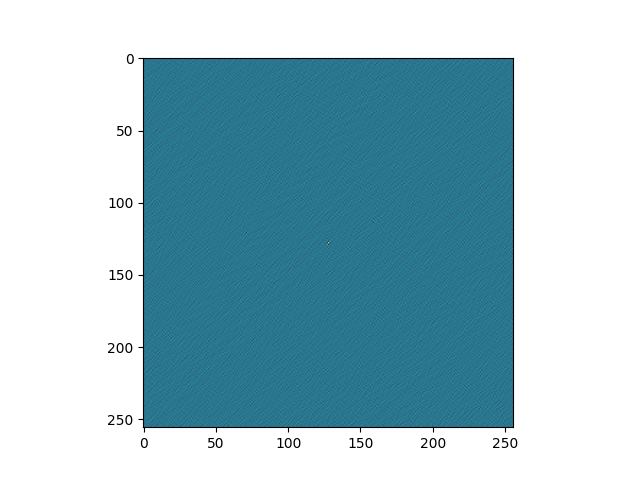

In [19]:
plt.figure()
plt.imshow(np.fft.fftshift(dbox0[7,...]))

In [20]:
print(printstats(dbox[0,:,:]))

 max/min/mean/rms/sum/S/N = 1.75e+03/-1.10e+03/-4.70e-01/8.92e+01/-2.46e+05/19.6 peak at (0, 0, 0)


In [21]:
dmax = dbox.max()
dmax

1746

In [22]:
# Candidate in candidate.txt has a value of 4399
# which corresponds to the maximum value in the FFT of 17599 integer dividied by 4
dmax // 4 #tadah

436

In [24]:
print(din.shape)
din[0,:,0,0,0]

(659, 256, 32, 8, 2)


array([ 2,  6,  0, -2, -3,  5,  4, -3,  1,  2,  3, -2, -3,  1,  0, -4, -2,
       -5,  3, -7,  4,  1,  5,  2,  3,  4,  1, -3,  1,  5,  0,  2, -4,  1,
       -1,  4,  4, -3,  1, -3, -5,  2, -5, -7, -2,  1,  0,  1,  3,  0,  1,
        2, -2, -1,  4,  1,  1, -1,  5,  1, -1, -1,  4,  2, -4,  5,  0,  4,
       -3,  1, -4, -3,  1,  0,  2, -1, -4, -5, -3, -1, -1,  1,  0,  1,  0,
        0,  4,  1, -1, -5, -4,  1, -2, -4,  3, -5,  7,  3, -4, -4,  5, -3,
        2, -1,  1, -2,  3, -5, -4, -3, -3, -1,  3, -3,  0,  2, -2,  2,  3,
        4,  1, -7, -7, -4,  0,  3, -1,  2,  0, -5, -7,  0,  0,  0, -2,  2,
       -4,  4, -3,  0, -1, -5, -3, -2,  2,  4, -3,  2, -4,  1,  1,  3, -7,
        1, -2, -1, -1,  2, -2, -3, -2,  4,  1, -4, -2,  2,  0,  1, -2, -1,
        3,  2, -1, -4,  0,  2,  0, -1,  3, -1, -5,  0,  1, -2, -4,  4, -2,
        5, -1,  5, -6, -2, -2,  5,  3,  0, -2,  2,  6,  0,  0, -3,  3,  4,
       -5,  4,  3, -1, -3, -2,  2, -1,  2, -3, -5, -4, -5,  1, -3,  1, -2,
        5,  0, -4,  1, -1

In [26]:
print(dbox.shape)
print(dbox[0,...].reshape(8,-1).std(axis=1))

(1024, 8, 256, 256)
[93.10003118 88.75616398 87.54894409 88.94020226 89.66002401 87.46142481
 88.4146967  89.67684697]


In [27]:
print(d.shape)

(83, 186, 11, 256, 8, 2)


In [28]:
d[0,0,0,:,0,0].std()

17.962701087840152

In [29]:
din.shape

(659, 256, 32, 8, 2)